## Installing Scikit-learn

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\abdul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Loading and Exploring Datasets in Scikit-learn

Scikit-learn comes with several ready-to-use datasets for learning and testing ML models. These include:

*  `load_iris()` – 🌸 Iris flower classification (very popular!)  
* `load_digits()` – 🧮 Handwritten digit recognition
* `load_breast_cancer()` – 🔬 Breast cancer classification
* `load_wine()` – 🍷 Wine classification
* `load_diabetes()` – 🧪 Diabetes progression (regression)

Let’s use the Iris dataset to get started.



### Loading the Iris Dataset

In [1]:
from sklearn.datasets import load_iris

#Load the iris dataset
iris=load_iris()

# Check the structure of the data
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


When you load a dataset using `load_iris()` or similar functions, it returns a Bunch object, which is similar to a dictionary.  

The dataset includes:  
**data:** A 2D NumPy array containing the feature values.  
**target:** The target labels (what we're trying to predict).  
**feature_names:** A list of feature names.  
**target_names:** The names of the target classes (for classification tasks).

### Exploring the Dataset

#### Features (`data`)

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
print(iris.data.shape)
print(iris.data[:5])  # First 5 rows

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


150 samples  
4 features (sepal length, sepal width, petal length, petal width)

#### Target (`target`)

In [4]:
print(iris.target[:5])
iris.target_names

[0 0 0 0 0]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Converting to a Pandas DataFrame  
To work more easily, convert the data into a pandas DataFrame:

In [7]:
import pandas as pd

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


#### Visualizing the Dataset

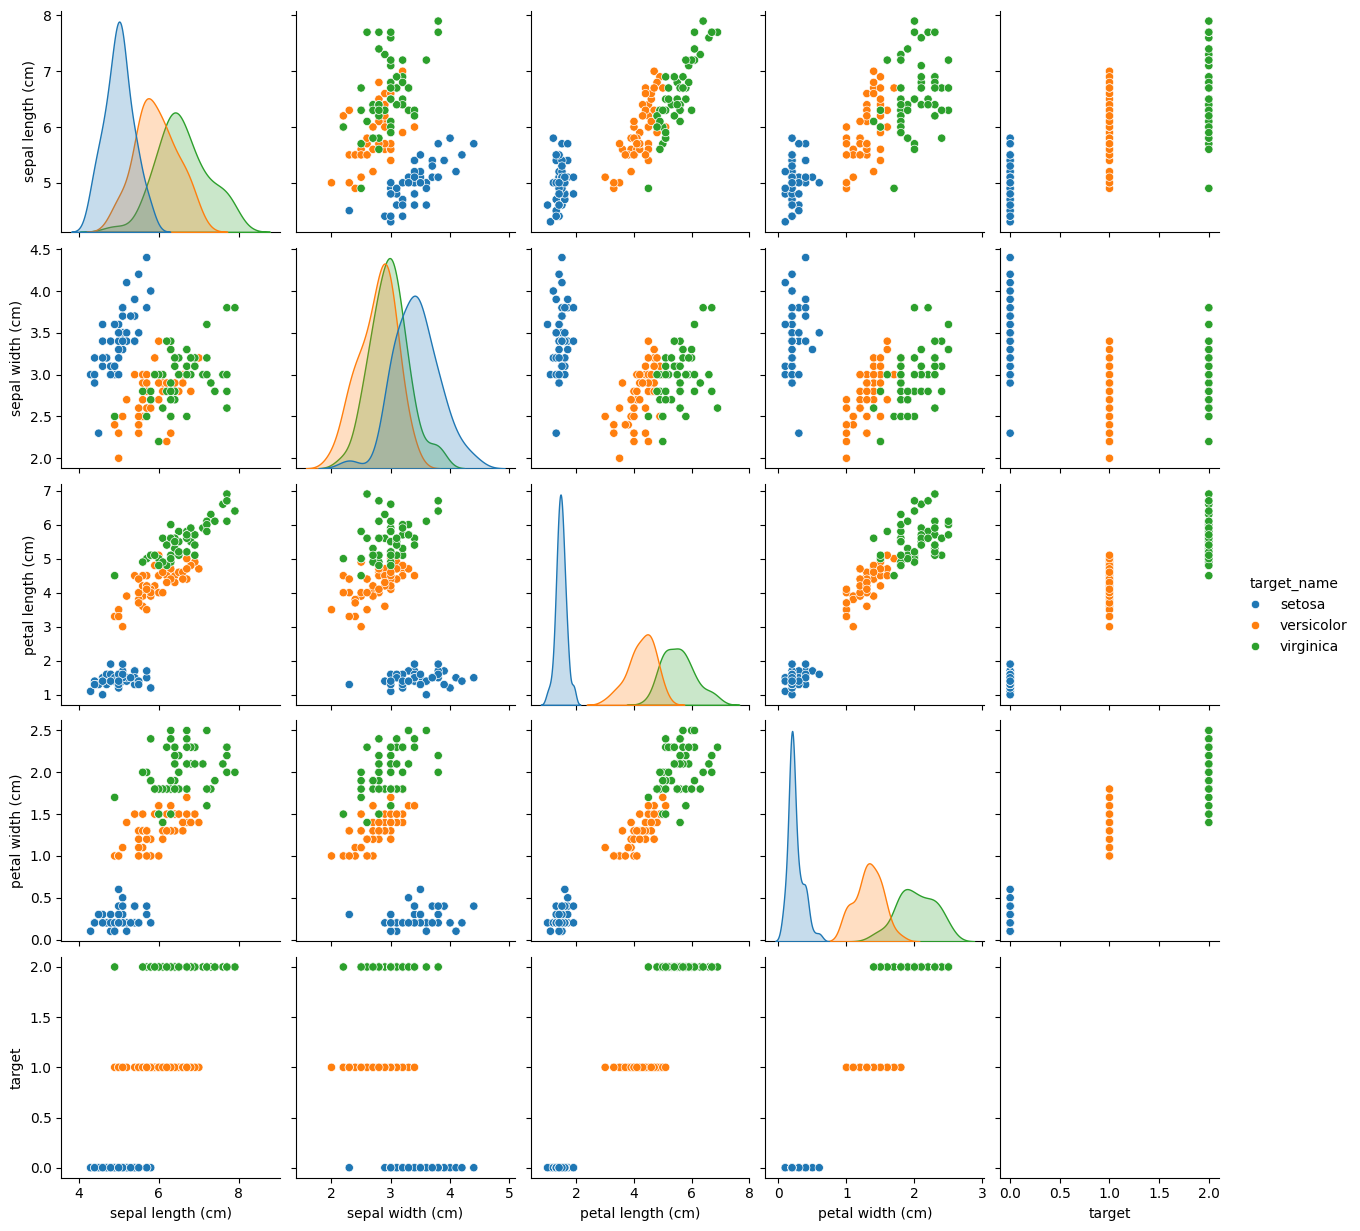

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target_name')
plt.show()


# Preprocessing and Feature Engineering


### Splitting the Dataset  
Use `train_test_split()` to divide your data:

In [10]:
from sklearn.model_selection import train_test_split

# X = features (input), y = target (output)
X = df.drop(['target', 'target_name'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling (Standardization)  
Most ML algorithms (especially distance-based ones like SVM, KNN, etc.) require features to be on the same scale.  

Use `StandardScaler` to scale features:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


`fit_transform()` calculates mean and std, then transforms.  

`transform()` uses the same parameters for test data.

### Encoding Categorical Variables  
In case your dataset contains non-numeric (categorical) features:

In [ ]:
# One-hot encoding:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['column_name']])
# (We’ll use this in real-world datasets later, since Iris is fully numeric.)

### Handling Missing Values  
To fill or remove missing values:

In [13]:
from sklearn.impute import SimpleImputer

# Example: fill missing with mean
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)


# Building a Classification Model

###  Import the Model and Train

In [14]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

### Make Predictions

In [15]:
# Predict the labels for test data
y_pred = model.predict(X_test_scaled)

# See some predictions
print("Predicted labels:", y_pred[:5])
print("True labels     :", y_test[:5].values)


Predicted labels: [1 0 2 1 1]
True labels     : [1 0 2 1 1]


### Evaluate the Model

#### Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


#### Classification Report

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Confusion Matrix

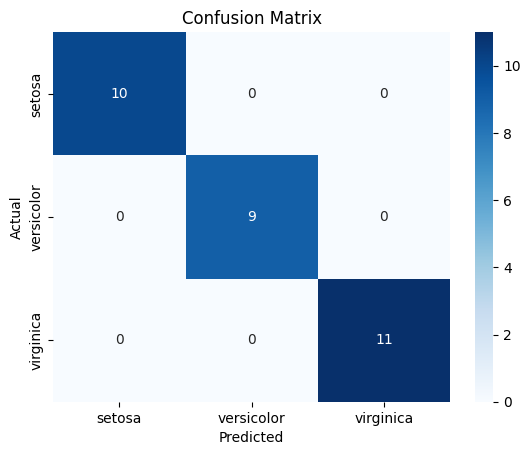

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
